Reshaped: (24000, 784)

Example Images:


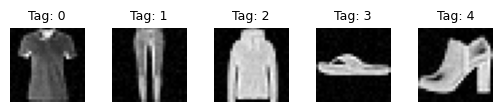

In [13]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import warnings

warnings.filterwarnings("ignore", category=RuntimeWarning)

# Loading the data

with open('TrainData.pkl', 'rb') as file:
    train_data = pickle.load(file)

with open('TestData.pkl', 'rb') as test_file:
    test_data = pickle.load(test_file)

data_matrix = train_data['X'].T
y_tags = train_data['Y']
test_matrix = test_data['X'].T
y_tag_test = test_data['Y']
reshaped_test_data = test_matrix.reshape(6000,784) 

# Showing an image from each tag

counter = 0
for i in range(5):
    while y_tags[counter] != i:
        counter += 1
    plt.subplot(1,6,i+1)
    plt.axis('off')
    plt.imshow(data_matrix[counter].T, cmap='gray')
    plt.title(f'Tag: {i}',size= 9)
    plt.tight_layout(pad=2)
    counter = 0    

# Printing the new dimensions of the data matrix.

reshaped_data = data_matrix.reshape(24000, 784)
print(f'Reshaped: {reshaped_data.shape}\n')
print('Example Images:')

# Calculating the number of elements with the same tag
data_num = np.zeros(5)
count_arr = np.zeros(5)
for i in range(24000):
        data_num[y_tags[i]] += 1

# Unraveling the data by building individual vectors of the same tags.
data_by_tag = {
    0: np.zeros((int(data_num[0]), 784)),
    1: np.zeros((int(data_num[1]), 784)),
    2: np.zeros((int(data_num[2]), 784)),
    3: np.zeros((int(data_num[3]), 784)),
    4: np.zeros((int(data_num[4]), 784)),
}

for i in range(24000):
    data_by_tag[y_tags[i]][int(count_arr[y_tags[i]])] = reshaped_data[i]
    count_arr[y_tags[i]] += 1


Average Images:

We can see that the average images took the general form of the type of clothing that they represent.
Moreover, we can notice that the sandals and ankle-boots are overlapping.


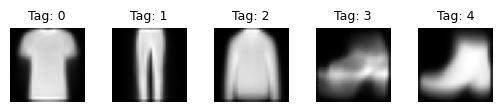

In [14]:
priors = {
0: data_num[0]/24000,
1: data_num[1]/24000,
2: data_num[2]/24000,
3: data_num[3]/24000,
4: data_num[4]/24000,
}

# Calculating the variance for each tag
variance = np.zeros((5, 784))
for i in range(5):
    variance[i] = (np.var(data_by_tag[i], axis=0))

# Gaussian function
def gaussian(x, mu, sigma):
    result = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-((x - mu) ** 2) / (2 * sigma ** 2))
    if (result < 1e-323).any():
        return 0
    return result

# Prediction function
def predict(vector, means, variances, priors):
    posteriors = np.zeros(5)
    for i in range(5):
        prior = np.log(priors[i])
        std_devs = np.sqrt(variances[i])
        likelihood = np.sum(np.log(gaussian(vector, means[i], std_devs)))
        posteriors[i] = prior + likelihood
    return  (np.argmax(posteriors))

# Calculating the average of each tag
average = np.zeros((5, 784))
for i in range(5):
    average[i] = np.average(data_by_tag[i], axis=0)

average_image = average.reshape(5,28,28)
print('Average Images:\n')
print('We can see that the average images took the general form of the type of clothing that they represent.')
print('Moreover, we can notice that the sandals and ankle-boots are overlapping.')
for i in range(5):
    plt.subplot(1,6,i+1)
    plt.axis('off')
    plt.imshow(average_image[i].T, cmap='gray')
    plt.title(f'Tag: {i}',size= 9)
    plt.tight_layout(pad=2)
    counter = 0    

In [15]:
# Building the confusion matrix, and calculating the accuracy of the classifier
confusion_matrix = np.zeros((5, 5))
correct_predictions = 0

for i in range(24000):
    predicted_label = predict(reshaped_data[i], average, variance, priors)
    real_label = y_tags[i]
    
    confusion_matrix[real_label][predicted_label] += 1
    
    if predicted_label == real_label:
        correct_predictions += 1

# Prints the confusion matrix in a neat looking format
# Indexes: (0, T-Shirts) (1, Trouser) (2, Coat) (3, Sandal) (4, Ankle-Boot)
def print_matrix(matrix):
    matrix = np.array(matrix)

    max_width = max(len(f"{int(val)}") for val in matrix.flatten()) + 2
    
    for row in matrix:
        formatted_row = " ".join(f"{int(val):{max_width}}" for val in row)
        print(formatted_row)


accuracy = correct_predictions / 24000
np.set_printoptions(suppress =True)
print(f'Accuracy: {accuracy * 100}%\n')
print('Confusion Matrix:\n')
print_matrix(confusion_matrix)


Accuracy: 91.10000000000001%

Confusion Matrix:

  4151    484    150      8      0
   158   4630     42      0      0
   164    353   4303      4      0
    22      5      4   4522    219
    11      1      4    507   4258


In [16]:
# Building the confusion matrix, and calculating the accuracy of the classifier
confusion_matrix = np.zeros((5, 5))
correct_predictions = 0

for i in range(6000):
    predicted_label = predict(reshaped_test_data[i], average, variance, priors)
    real_label = y_tag_test[i]
    
    confusion_matrix[real_label][predicted_label] += 1
    
    if predicted_label == real_label:
        correct_predictions += 1

# Prints the confusion matrix in a neat looking format
# Indexes: (0, T-Shirts) (1, Trouser) (2, Coat) (3, Sandal) (4, Ankle-Boot)
accuracy = correct_predictions / 6000
np.set_printoptions(suppress = True)
print(f'Accuracy: {accuracy * 100}%\n')
print('Confusion Matrix:\n')
print_matrix(confusion_matrix)

Accuracy: 90.43333333333334%

Confusion Matrix:

  1042    120     45      0      0
    42   1118     10      0      0
    50     91   1034      1      0
     3      1      1   1155     68
     5      1      1    135   1077
